# Titanic dataset

This dataset comes from Kaggle (that can be found https://www.kaggle.com/c/titanic) and it's designed for new students, who make them first steps in the Data Science. My algorithm will try to predict whether the passenger the catastrophe or not. 

The data constis of 12 features regarding person's information such as age or number of siblings on the board and there is 'Survived' column, which is a label column. Since this file has already been cleaned I'll not conduct Data Engineering activities.

## Importing all necessary libraries and checking basic inforamtion about DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np 
%matplotlib inline

In [133]:
df = pd.read_csv("titanic_train.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Explaratory Data Analysis & Handling missing data

Let's explore our Data a bit! Firstly I'll check if there is some missing data

Text(0.5, 34.0, 'Features')

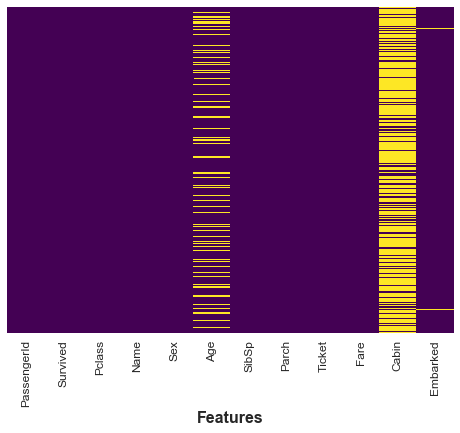

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,  cmap = 'viridis')
plt.xticks(fontsize = 12)
plt.xlabel('Features', fontsize=16, weight = 'bold', family = 'Arial')

### 'Cabin' column

As we can see, there are a lot of empty rows in the 'Cabin' column, so since there is not enough data to fill those holes reasonably the best way to handle it is to drop this particular column

In [134]:
df.drop('Cabin', axis = 1, inplace=True)

### Age column

A little fraction of data from 'Age' column is missing. However in this case, since there is only little missing data, maybe we can use other features in order to put some reasonable values values there? Let's check our dataset again!

In [135]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In my perspective, the best way to tackle this problem is to fill these empty values with the mean values with regards to the passenger's ticket class. 

Let's see these mean values and then write a function!

In [136]:
pd.DataFrame(df.groupby(by='Pclass')['Age'].mean())

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


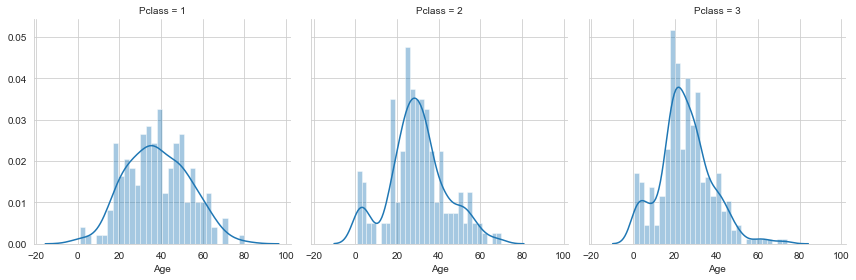

In [137]:
g = sns.FacetGrid(df, col='Pclass', height = 4)
g.map(sns.distplot, 'Age', bins = 30)

In [138]:
means = []
for num in range(1,4):
    means.append(round(df[df['Pclass'] == num]['Age'].mean()))
means = tuple(means)

In [139]:
def fill_Age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
            return means[int(Pclass) - 1]
    else:
        return Age

In [140]:
df['Age'] = df[['Age','Pclass']].apply(fill_Age, axis = 1)

Text(0.5, 34.0, 'Features')

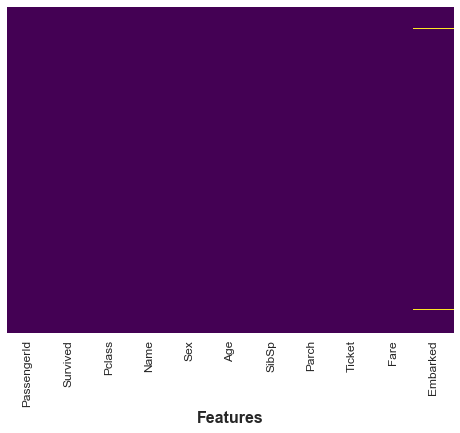

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,  cmap = 'viridis')
plt.xticks(fontsize = 12)
plt.xlabel('Features', fontsize=16, weight = 'bold', family = 'Arial')

As we can see, there is no much missing data left, so I'm gonna to delete rows with empty values

In [141]:
df.dropna(inplace=True)

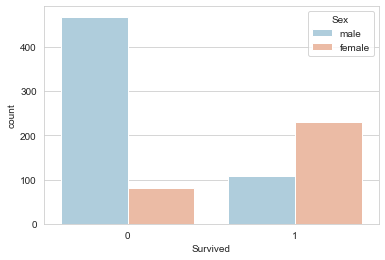

In [127]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

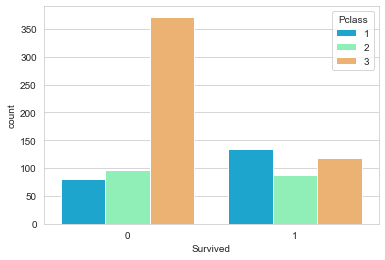

In [128]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [129]:
import cufflinks as cf
cf.go_offline()
df['Fare'].iplot(kind='hist',bins=30,color='green')

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting categorical features

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


As we can see columns such as Name, Sex, Ticket and Embarked are categorical. Since both Name and Ticker probably won't generate useful insights, I'm gonna og ahead and drop them. The rest I'm going to change to numerical values

In [ ]:
df.drop(['Name', 'Ticket'], axis = 1, inplace=True)

In [151]:
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [155]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [156]:
embarekd = pd.get_dummies(df['Embarked'], drop_first=True)

In [164]:
df = pd.concat([df,embarekd], axis = 1)

In [165]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Creating and fitting model

In [166]:
from sklearn.model_selection import train_test_split

In [168]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
model = LogisticRegression()

In [172]:
model.fit(X_train,y_train)

C:\Users\mike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
predictions = model.predict(X_test)

## Model  evaluations

In [174]:
from sklearn.metrics import classification_report, confusion_matrix

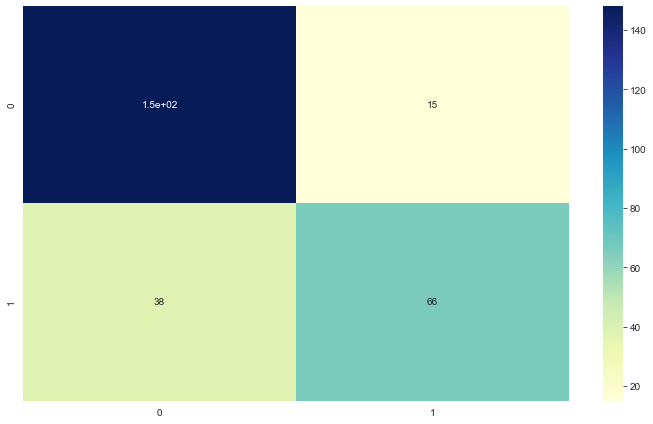

In [175]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="YlGnBu")
plt.tight_layout()

In [176]:
print(classification_report(y_test, predictions))1

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.81      0.63      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

